In [1]:
!pip install kaggle

In [2]:
!pip install torch torchvision ftfy regex tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.6 MB/s eta 0:00:00


Importing **Splitting Filker face dataset**

In [3]:
!kaggle datasets download -d tommykamaz/faces-dataset-small

Dataset URL: https://www.kaggle.com/datasets/tommykamaz/faces-dataset-small
License(s): Attribution 4.0 International (CC BY 4.0)
100% 3.98G/3.99G [01:43<00:00, 41.0MB/s]
100% 3.99G/3.99G [01:43<00:00, 41.5MB/s]


In [4]:
import zipfile
import os

zip_file_path = '/content/faces-dataset-small.zip'
extract_path = '/content/real_face/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed!")


Unzipping completed!


In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [6]:
real_face_dataset = '/content/real_face/faces_dataset_small'

In [7]:
def show_samples(image_folder, num_samples=5):
    # Get a list of all images in the specified folder
    all_images = os.listdir(image_folder)

    # Randomly select a few images to display
    selected_images = random.sample(all_images, num_samples)

    # Plot the selected images
    plt.figure(figsize=(15, 6))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(image_folder, img_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_samples, i + 1)  # Create a subplot for each image
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title(img_name)  # Show the image name as title

    plt.tight_layout()
    plt.show()

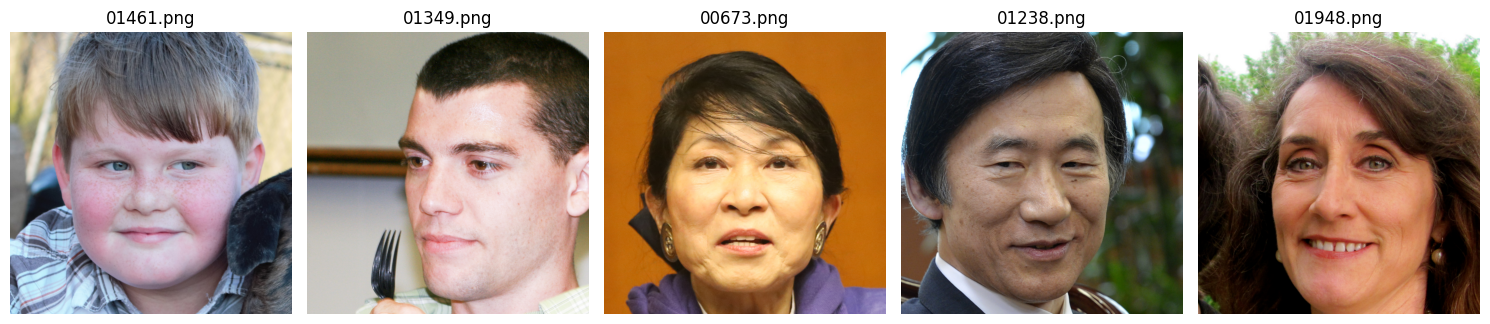

In [8]:
show_samples(real_face_dataset, num_samples=5)

Splitting Filker face dataset to train test datasets

In [9]:
import shutil
from sklearn.model_selection import train_test_split

In [10]:
real_face_dataset = '/content/real_face'
train_dir = '/content/real_face_dataset/train/'
test_dir = '/content/real_face_dataset/test/'

In [11]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [12]:
classes = os.listdir(real_face_dataset)

In [13]:
for class_name in classes:
    class_path = os.path.join(real_face_dataset, class_name)

    # Skip if it's not a directory (class folder)
    if not os.path.isdir(class_path):
        continue

    # Create corresponding train/test directories for this class
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # List all images in the class folder
    images = os.listdir(class_path)

    # Split the images into train (80%) and test (20%) sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Move the images to their respective folders
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset has been split into training and testing sets!")

Dataset has been split into training and testing sets!


Loading The **Synthetic Faces High Quality** (SHFQ)

In [14]:
!pip install torchvision

In [15]:
!kaggle datasets download -d selfishgene/synthetic-faces-high-quality-sfhq-part-2


Dataset URL: https://www.kaggle.com/datasets/selfishgene/synthetic-faces-high-quality-sfhq-part-2
License(s): CC0-1.0
100% 13.5G/13.5G [08:18<00:00, 39.2MB/s]
100% 13.5G/13.5G [08:18<00:00, 29.1MB/s]


In [16]:
import zipfile
import os

zip_file_path = '/content/synthetic-faces-high-quality-sfhq-part-2.zip'
extract_path = '/content/synthetic_faces_dataset/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed!")


Unzipping completed!


In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

In [18]:
dataset_path = '/content/synthetic_faces_dataset/images/images'


In [19]:
def display_images(num_images=5):
    images = []
    image_files = os.listdir(dataset_path)

    # Load the specified number of images
    for i in range(min(num_images, len(image_files))):
        img_path = os.path.join(dataset_path, image_files[i])
        img = Image.open(img_path).convert("RGB")  # Open image and convert to RGB
        images.append(img)

    # Display the images
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

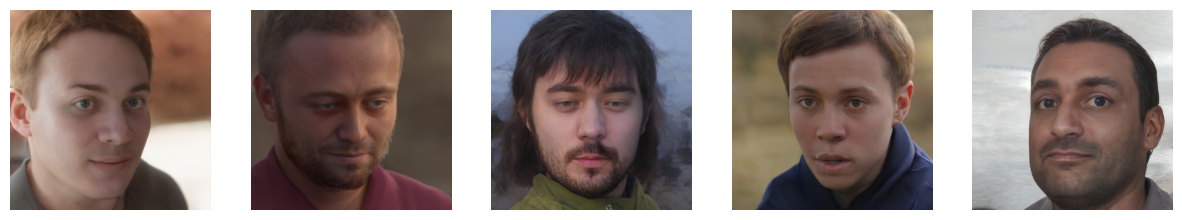

In [20]:
display_images(num_images=5)

Splitting into train test data set

In [21]:
dataset_dir = '/content/synthetic_faces_dataset/images/images'
train_dir = '/content/synthetic_faces_dataset/train/'
test_dir = '/content/synthetic_faces_dataset/test/'

In [22]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [23]:
image_extensions = ['.jpg', '.jpeg', '.png']

# List all image files in the dataset directory
images = [img for img in os.listdir(dataset_dir) if os.path.splitext(img)[1].lower() in image_extensions]



In [24]:
import random
from sklearn.model_selection import train_test_split
import shutil
import os

# Set a fixed random seed for reproducibility
random.seed(42)  # Any integer works, but using the same ensures the same selection each time

# Randomly select 3000 images from the total images
selected_images = random.sample(images, 3000)

# Split the selected images into training and testing sets
train_images, test_images = train_test_split(selected_images, test_size=0.2, random_state=42)

# Move the images to their respective train/test directories
for img in train_images:
    shutil.move(os.path.join(dataset_dir, img), os.path.join(train_dir, img))

for img in test_images:
    shutil.move(os.path.join(dataset_dir, img), os.path.join(test_dir, img))

print("Dataset has been split into training and testing sets for 3000 selected images!")



Dataset has been split into training and testing sets for 3000 selected images!


In [25]:
!rm -rf /content/real_face_dataset/train/.ipynb_checkpoints
!rm -rf /content/synthetic_faces_dataset/train/.ipynb_checkpoints


In [26]:
import os

# Define the paths to the datasets
real_train = '/content/real_face_dataset/train/faces_dataset_small'
synthetic_train = '/content/synthetic_faces_dataset/train'
real_test = '/content/real_face_dataset/test/faces_dataset_small'
synthetic_test = '/content/synthetic_faces_dataset/test'

# Function to count images in a directory
def count_images_in_directory(directory):
    return len([file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))])

# Count images in each directory
num_real_train = count_images_in_directory(real_train)
num_synthetic_train = count_images_in_directory(synthetic_train)
num_real_test = count_images_in_directory(real_test)
num_synthetic_test = count_images_in_directory(synthetic_test)

print(f'Number of images in real faces train: {num_real_train}')
print(f'Number of images in synthetic faces train: {num_synthetic_train}')
print(f'Number of images in real faces test: {num_real_test}')
print(f'Number of images in synthetic faces test: {num_synthetic_test}')


Number of images in real faces train: 2514
Number of images in synthetic faces train: 2400
Number of images in real faces test: 629
Number of images in synthetic faces test: 600


In [29]:
print('Hi Team 👋')

Hi Team 👋
